In [175]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import DataFrame, concat
import pandas as pd
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [176]:
file_path = r'D:\project-rice-yield-prediction\datasets and notes\BD-rice(ok).xlsx'
df= pd.read_excel(file_path,sheet_name='Aman',skiprows=1)

In [177]:
df

,rice,year,district,weather district,division,yield,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,Aman,2006,Bagerhat,Khulna,Khulna,0.728570,16.838710,11.741935,0.033333,0.000000,28.9,28.7,24.1,20.2
1,Aman,2007,Bagerhat,Khulna,Khulna,0.522331,19.064516,5.161290,3.766667,0.000000,28.6,29.3,24.2,19.1
2,Aman,2008,Bagerhat,Khulna,Khulna,0.663455,9.709677,6.516129,0.000000,0.000000,28.5,29.0,24.1,20.6
3,Aman,2009,Bagerhat,Khulna,Khulna,0.769729,11.193548,18.322581,0.666667,0.000000,29.0,29.0,24.5,19.3
4,Aman,2010,Bagerhat,Khulna,Khulna,0.710355,5.806452,6.612903,0.000000,0.419355,29.6,29.7,25.1,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Aman,2017,Thakurgaon,Dinajpur,Rangpur,1.138931,6.290323,21.129032,0.000000,0.000000,29.3,29.6,22.1,19.2
1319,Aman,2018,Thakurgaon,Dinajpur,Rangpur,1.159884,5.322581,5.290323,0.000000,0.322581,29.9,30.1,21.8,17.3
1320,Aman,2019,Thakurgaon,Dinajpur,Rangpur,1.170860,21.935484,10.580645,0.000000,0.000000,29.4,30.4,23.2,16.5
1321,Aman,2020,Thakurgaon,Dinajpur,Rangpur,1.083696,19.935484,10.258065,0.100000,0.000000,28.9,30.2,22.0,17.7


In [178]:
# Filter out the yield data
data = df[df['yield'].notnull()]

In [131]:
data

,rice,year,district,weather district,division,yield,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,Aman,2006,Bagerhat,Khulna,Khulna,0.728570,16.838710,11.741935,0.033333,0.000000,28.9,28.7,24.1,20.2
1,Aman,2007,Bagerhat,Khulna,Khulna,0.522331,19.064516,5.161290,3.766667,0.000000,28.6,29.3,24.2,19.1
2,Aman,2008,Bagerhat,Khulna,Khulna,0.663455,9.709677,6.516129,0.000000,0.000000,28.5,29.0,24.1,20.6
3,Aman,2009,Bagerhat,Khulna,Khulna,0.769729,11.193548,18.322581,0.666667,0.000000,29.0,29.0,24.5,19.3
4,Aman,2010,Bagerhat,Khulna,Khulna,0.710355,5.806452,6.612903,0.000000,0.419355,29.6,29.7,25.1,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Aman,2017,Thakurgaon,Dinajpur,Rangpur,1.138931,6.290323,21.129032,0.000000,0.000000,29.3,29.6,22.1,19.2
1319,Aman,2018,Thakurgaon,Dinajpur,Rangpur,1.159884,5.322581,5.290323,0.000000,0.322581,29.9,30.1,21.8,17.3
1320,Aman,2019,Thakurgaon,Dinajpur,Rangpur,1.170860,21.935484,10.580645,0.000000,0.000000,29.4,30.4,23.2,16.5
1321,Aman,2020,Thakurgaon,Dinajpur,Rangpur,1.083696,19.935484,10.258065,0.100000,0.000000,28.9,30.2,22.0,17.7


In [179]:
# Dropping the specified columns
data_dropped = data.drop(columns=['rice', 'weather district', 'division'])

# Display the remaining columns
print(data_dropped.columns)


Index(['year', 'district', 'yield', 'precip_1', 'precip_2', 'precip_5',
       'precip_6', 'temp_1', 'temp_2', 'temp_5', 'temp_6'],
      dtype='object')


# Districts Starting in 2006 (Backward Padding for 1993-2005)

In [180]:
df = pd.DataFrame(data_dropped)

# Workflow 1: Backward Padding for districts starting from 2006
# Filter districts starting from 2006
start_2006 = df[df['year'] >= 2006].groupby('district')

# Create missing rows for years 1993-2005 for each district starting in 2006
for district, group in start_2006:
    missing_years = pd.DataFrame({
        'district': [district] * (2006 - 1993),
        'year': list(range(1993, 2006)),
        'yield': [group['yield'].iloc[0]] * (2006 - 1993),  # Backward fill from 2006
        'precip_1': [group['precip_1'].iloc[0]] * (2006 - 1993),
        'precip_2': [group['precip_2'].iloc[0]] * (2006 - 1993),
        'precip_5': [group['precip_5'].iloc[0]] * (2006 - 1993),
        'precip_6': [group['precip_6'].iloc[0]] * (2006 - 1993),
        'temp_1': [group['temp_1'].iloc[0]] * (2006 - 1993),
        'temp_2': [group['temp_2'].iloc[0]] * (2006 - 1993),
        'temp_5': [group['temp_5'].iloc[0]] * (2006 - 1993),
        'temp_6': [group['temp_6'].iloc[0]] * (2006 - 1993)
    })
    # Append the missing years back to the original dataframe
    df = pd.concat([df, missing_years], ignore_index=True)

# Sort the dataframe by district and year for clear order
df = df.sort_values(by=['district', 'year']).reset_index(drop=True)


df.head()


,year,district,yield,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,1993,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2
1,1994,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2
2,1995,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2
3,1996,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2
4,1997,Bagerhat,0.72857,16.83871,11.741935,0.033333,0.0,28.9,28.7,24.1,20.2


In [181]:
# Set 'district' and 'year' as the index and keep the necessary columns
yield_data = df.set_index(['district', 'year'])[['yield','precip_1', 'precip_2', 'precip_5', 'precip_6', 
                                               'temp_1', 'temp_2', 'temp_5', 'temp_6',]]

# Display the reshaped DataFrame
yield_data.head()


yield  precip_1   precip_2  precip_5  precip_6  temp_1  \
district year                                                             
Bagerhat 1993  0.72857  16.83871  11.741935  0.033333       0.0    28.9   
         1994  0.72857  16.83871  11.741935  0.033333       0.0    28.9   
         1995  0.72857  16.83871  11.741935  0.033333       0.0    28.9   
         1996  0.72857  16.83871  11.741935  0.033333       0.0    28.9   
         1997  0.72857  16.83871  11.741935  0.033333       0.0    28.9   

               temp_2  temp_5  temp_6  
district year                          
Bagerhat 1993    28.7    24.1    20.2  
         1994    28.7    24.1    20.2  
         1995    28.7    24.1    20.2  
         1996    28.7    24.1    20.2  
         1997    28.7    24.1    20.2

In [182]:
yield_data.shape

(2155, 9)

In [183]:
# Group the data by 'district' and sum the 'yield' for each district
top_10_districts = pd.DataFrame(yield_data.groupby('district')['yield'].sum()).sort_values(by='yield', ascending=False).reset_index()

# Get the names of the top 10 districts
top_10_district_names = top_10_districts['district'][:10]
top_10_district_names


0    Khagrachari
1     Chittagong
2      Bandarban
3      Rangamati
4        Jessore
5        Kushtia
6        Rangpur
7       Rajshahi
8    Kishoregonj
9          Bogra
Name: district, dtype: object

In [69]:
top_10_districts.head(10)

,district,yield
0,Khagrachari,43.962612
1,Chittagong,43.670701
2,Bandarban,43.648252
3,Rangamati,43.468955
4,Jessore,40.656823
5,Kushtia,39.985933
6,Rangpur,39.574100
7,Rajshahi,39.392339
8,Kishoregonj,39.032074
9,Bogra,37.959269


# Data Standardization


In [184]:
# Normalize the data: Drop the target variable 'yield' and categorical columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(yield_data.drop(columns=['yield']))

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(data=scaled, columns=yield_data.drop(columns=['yield']).columns)

In [185]:
# Check the normalized data
scaled_df.head()

,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429
1,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429
2,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429
3,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429
4,0.293917,0.245844,0.00274,0.0,0.617647,0.484848,0.681818,0.571429


In [186]:
# Create a copy of the original DataFrame
yield_data_scaled = yield_data.copy()

# Replace the relevant columns with the scaled values
yield_data_scaled[scaled_df.columns] = np.array(scaled_df)

# Set the index of the DataFrame to 'district' and 'year'
yield_data_scaled = yield_data_scaled.reset_index().set_index(['district', 'year'])

# Display the first few rows of the updated DataFrame
yield_data_scaled.head()


yield  precip_1  precip_2  precip_5  precip_6    temp_1  \
district year                                                              
Bagerhat 1993  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   
         1994  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   
         1995  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   
         1996  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   
         1997  0.72857  0.293917  0.245844   0.00274       0.0  0.617647   

                 temp_2    temp_5    temp_6  
district year                                
Bagerhat 1993  0.484848  0.681818  0.571429  
         1994  0.484848  0.681818  0.571429  
         1995  0.484848  0.681818  0.571429  
         1996  0.484848  0.681818  0.571429  
         1997  0.484848  0.681818  0.571429

#  Train Test Split

In [187]:
# Function to split the data into train and test sets
def train_test_split(data):
    # Calculate the size of the training set (80% of the data)
    size = int(len(data) * 0.8)

    # For train data, collect 80% of the data, dropping the target variable 'yield'
    x_train = data.drop(columns=['yield']).iloc[0:size]
    
    # For test data, collect the remaining 20% of the data
    x_test = data.drop(columns=['yield']).iloc[size:]

    # Define the target variable for training and testing
    y_train = data['yield'].iloc[0:size]
    y_test = data['yield'].iloc[size:]

    return x_train, x_test, y_train, y_test


In [189]:
yield_data_scaled.shape

(2155, 9)

In [190]:
# Get unique districts
districts = yield_data_scaled.index.levels[0]  # Get the unique districts from the first level of the index



# Initialize empty lists for training and testing data
X_train = []
X_test = []
Y_train = []
Y_test = []

for district in districts:
    data = yield_data_scaled.xs(district, level='district')  # Get data for the current district
    
    # Optionally, reset the index and add the district back
    data_reset = data.reset_index()  # This will make 'year' a column
    data_reset['district'] = district  # Add the district back as a column
    data_reset = data_reset.set_index(['district', 'year'])  # Set the index back to district and year

    # Apply the function to split the data
    x_train, x_test, y_train, y_test = train_test_split(data_reset) 
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)




In [143]:
X_train[0].head()

precip_1  precip_2  precip_5  precip_6    temp_1    temp_2  \
district year                                                               
Bagerhat 1993  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1994  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1995  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1996  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1997  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   

                 temp_5    temp_6  
district year                      
Bagerhat 1993  0.681818  0.571429  
         1994  0.681818  0.571429  
         1995  0.681818  0.571429  
         1996  0.681818  0.571429  
         1997  0.681818  0.571429

In [144]:
Y_train[0].head()

district  year
Bagerhat  1993    0.72857
          1994    0.72857
          1995    0.72857
          1996    0.72857
          1997    0.72857
Name: yield, dtype: float64

In [191]:
# concatenate each train dataset in X_train list and Y_train list respectively 
X_train=pd.concat(X_train)
Y_train=pd.DataFrame(pd.concat(Y_train))
# concatenate each test dataset in X_test list and Y_test list respectively
X_test=pd.concat(X_test)
Y_test=pd.DataFrame(pd.concat(Y_test))

In [146]:
# double check the train data and test data and our target 
X_train.head()

precip_1  precip_2  precip_5  precip_6    temp_1    temp_2  \
district year                                                               
Bagerhat 1993  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1994  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1995  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1996  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1997  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   

                 temp_5    temp_6  
district year                      
Bagerhat 1993  0.681818  0.571429  
         1994  0.681818  0.571429  
         1995  0.681818  0.571429  
         1996  0.681818  0.571429  
         1997  0.681818  0.571429

In [192]:
X_train.shape

(1702, 8)

# Data Preprocessing

In [193]:
# Code Source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# create the reshape function
def reshape_data(train,test):
    #Frame as supervised learning and drop all time t columns except
    reframed_train = series_to_supervised(train, 1, 1)
    reframed_test = series_to_supervised(test, 1, 1)
    # split into train and test sets
    train= reframed_train.values
    test=reframed_test.values
    # split into input and outputs
    train_X, y_train = train[:, :-1], train[:, -1]
    test_X, y_test = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return x_train,x_test,y_train,y_test

In [194]:
encoder = LabelEncoder()
#combine X train and Y train as train data 
train_data=pd.DataFrame()
train_data[X_train.columns]=X_train
train_data[Y_train.columns]=Y_train

#combine X test and Y test as test data 
test_data=pd.DataFrame()
test_data[X_test.columns]=X_test
test_data[Y_test.columns]=Y_test


In [150]:
train_data.head()

precip_1  precip_2  precip_5  precip_6    temp_1    temp_2  \
district year                                                               
Bagerhat 1993  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1994  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1995  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1996  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   
         1997  0.293917  0.245844   0.00274       0.0  0.617647  0.484848   

                 temp_5    temp_6    yield  
district year                               
Bagerhat 1993  0.681818  0.571429  0.72857  
         1994  0.681818  0.571429  0.72857  
         1995  0.681818  0.571429  0.72857  
         1996  0.681818  0.571429  0.72857  
         1997  0.681818  0.571429  0.72857

In [195]:
# using the function to obtian reshaped x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=reshape_data(train_data,test_data)

In [196]:
# design network for confirmed cases data 
model = Sequential()
model.add(LSTM(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)

Epoch 1/30


C:\Users\88017\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6703
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1960
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1734
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1654
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1586
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1530
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1474
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1420
Epoch 9/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1361
Epoch 10/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1302
Epoch 11/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1247
Epoch 12/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1195
Epoch 13/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1134
Epoch 14/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1082
Epoch 15/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1033
Epoch 16/30
34/34 ━━━━━━━━━━━━

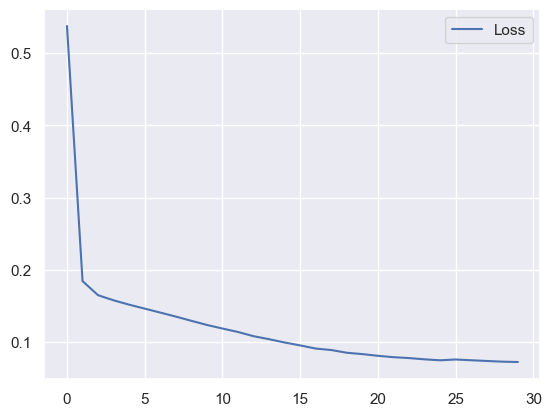

In [197]:
# plot history
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

# Make prediction

In [198]:
# make a prediction
y_test_pre=model.predict(x_test)
# check length
y_test_pre.shape,y_test.shape

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


((452, 1), (452,))

# Model Evaluation

In [235]:
pa=pd.DataFrame()
pa['year']=X_test.reset_index().year.iloc[1:-1]
pa['Prediction']=[i[0] for i in y_test_pre][1:] 
pa['Actual Values']=y_test[:-1]
pa.head()

,year,Prediction,Actual Values
1,2017,0.775761,0.725680
2,2018,0.591367,0.683724
3,2019,0.924107,0.817027
4,2020,0.830668,0.851027
5,2021,0.832119,0.894754


In [236]:

# Assuming 'pa' is your DataFrame
actual_values = pa['Actual Values']
print(actual_values)


1      0.725680
2      0.683724
3      0.817027
4      0.851027
5      0.894754
         ...   
447    1.148528
448    1.138931
449    1.159884
450    1.170860
451    1.083696
Name: Actual Values, Length: 451, dtype: float64


In [240]:
# Print the Prediction column
prediction = pa['Prediction']

print(predictions)


1      0.775761
2      0.591367
3      0.924107
4      0.830668
5      0.832119
         ...   
447    1.113195
448    1.180247
449    1.202515
450    1.221718
451    1.095318
Name: Prediction, Length: 451, dtype: float32


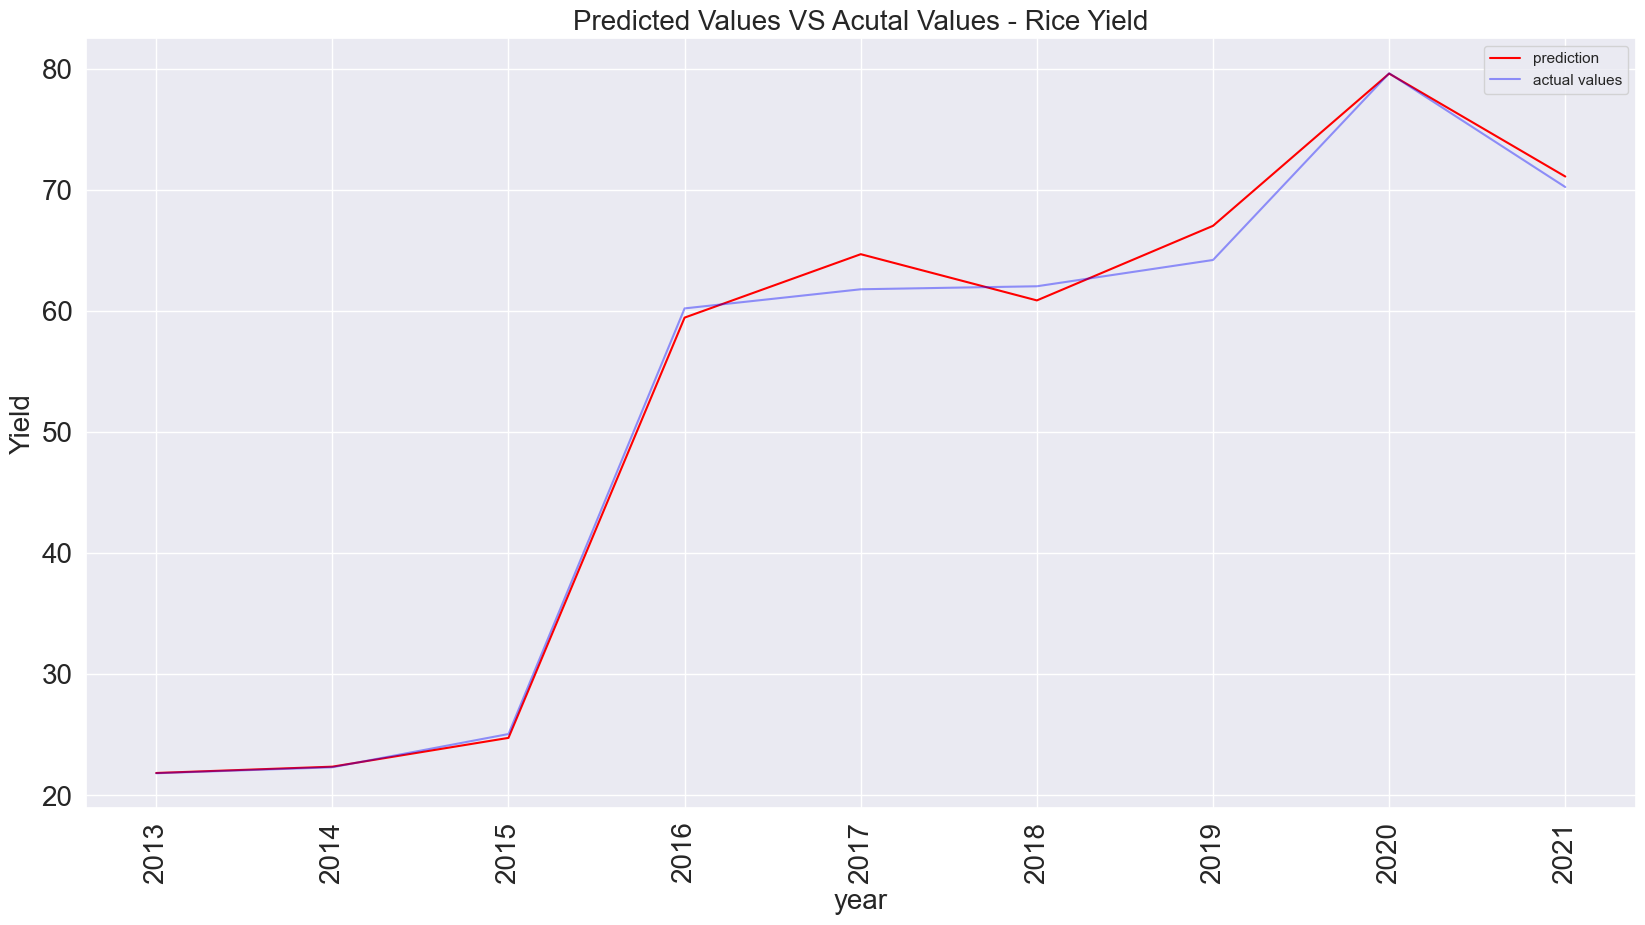

In [200]:
plt.figure(figsize=(20,10))
pa.groupby('year')['Prediction'].sum().plot(kind='line',label='prediction',color='red',alpha=1)
pa.groupby("year")['Actual Values'].sum().plot(kind='line',label='actual values',color='blue',alpha=0.4)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)

plt.ylabel('Yield',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.title('Predicted Values VS Acutal Values - Rice Yield',fontsize=20)
plt.legend()

# Regression Evaluation

# y_test[:-1], [i[0] for i in y_test_pre][1:]

It calculates the Mean Absolute Percentage Error between the actual values (excluding the last one) and 
the predicted values (excluding the first one).

In [201]:
# Assuming y_test and y_test_pre are defined, and they contain the actual and predicted values
predicted_values = [i[0] for i in y_test_pre][1:]


In [202]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R-squared 


In [203]:
from sklearn.metrics import r2_score

def R_squared(actual, prediction):
    r_squared = r2_score(actual, prediction)
    return r_squared


In [209]:
# Calculating R-squared
print("R²:", R_squared(y_test[:-1], [i[0] for i in y_test_pre][1:]))

R²: 0.9755153659637718


In [210]:
def R_Squared(actual, prediction):
    actual_mean = np.mean(actual)
    ss_total = np.sum((np.array(actual) - actual_mean)**2)  # Total sum of squares
    ss_residual = np.sum((np.array(actual) - np.array(prediction))**2)  # Residual sum of squares
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

In [211]:
# Calculating R-squared
print("R²:", R_Squared(y_test[:-1], [i[0] for i in y_test_pre][1:]))

R²: 0.9755153659637718


# Mean squared error

In [212]:
def MSE(actual, prediction):
    mse = np.mean((np.array(actual) - np.array(prediction))**2)
    return mse

In [213]:
# Calculating Mean Squared Error
print("MSE:", MSE(y_test[:-1], predicted_values))

MSE: 0.008288056725584643


In [214]:
print("MSE:", MSE(y_test[:-1], [i[0] for i in y_test_pre][1:]))

MSE: 0.008288056725584643


In [215]:
def MSE(actual, prediction):
    return mean_squared_error(actual, prediction)

In [216]:
print("MSE:", MSE(y_test[:-1], [i[0] for i in y_test_pre][1:]))

MSE: 0.008288056725584643


In [217]:
def MSE(actual, prediction):
    mse = mean_squared_error(actual, prediction)
    return mse

In [218]:
# Calculating Mean Squared Error
print("MSE:", MSE(y_test[:-1], predicted_values))

MSE: 0.008288056725584643


# Root mean squared error 

In [219]:
def RMSE(actual,prediction):
    rmse = np.sqrt(mean_squared_error(actual,prediction))
    return rmse

In [220]:
print(RMSE(y_test[:-1],[i[0] for i in y_test_pre][1:]))

0.09103876496078274


In [231]:
from sklearn.metrics import mean_squared_error
import numpy as np

def RMSE(actual, prediction):
    rmse = np.sqrt(mean_squared_error(actual, prediction))
    return rmse

# Example usage with your dataset:
rmse_value = RMSE(pa['Actual Values'], pa['Prediction'])
print(f"RMSE: {rmse_value}")


RMSE: 0.09103876496078274


In [222]:
def RMSE(actual, prediction):
    return np.sqrt(mean_squared_error(actual, prediction))

In [223]:
print("RMSE:", RMSE(y_test[:-1], [i[0] for i in y_test_pre][1:]))

RMSE: 0.09103876496078274


# Mean absolute error 

In [224]:
def MAE(actual, prediction):
    return mean_absolute_error(actual, prediction)

In [225]:
print("MAE:", MAE(y_test[:-1], [i[0] for i in y_test_pre][1:]))

MAE: 0.04797878577756578


In [226]:
import numpy as np

def MAE(actual, prediction):
    return np.mean(np.abs(np.array(actual) - np.array(prediction)))

# Example usage
print("MAE:", MAE(y_test[:-1], [i[0] for i in y_test_pre][1:]))


MAE: 0.04797878577756578


# Mean Absolute Percentage Error (MAPE) 

In [227]:
import numpy as np

def MAPE(actual, prediction):
    actual = np.array(actual)
    prediction = np.array(prediction)
    return np.mean(np.abs((actual - prediction) / actual)) * 100

# Example usage
print("MAPE:", MAPE(y_test[:-1], [i[0] for i in y_test_pre][1:]))


MAPE: 5.125860958079382


In [228]:
def MAPE(actual, prediction):
    return np.mean([abs((a - p) / a) for a, p in zip(actual, prediction)]) * 100

# Example usage
print("MAPE:", MAPE(y_test[:-1], [i[0] for i in y_test_pre][1:]))


MAPE: 5.125860958079382


# All regression in one box

In [232]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def R_squared(actual, prediction):
    return r2_score(actual, prediction)

def MSE(actual, prediction):
    return mean_squared_error(actual, prediction)

def RMSE(actual, prediction):
    return np.sqrt(mean_squared_error(actual, prediction))

def MAE(actual, prediction):
    return mean_absolute_error(actual, prediction)
    
def MAPE(actual, prediction):
    return np.mean([abs((a - p) / a) for a, p in zip(actual, prediction)]) * 100

# Assuming y_test and y_test_pre are defined, and they contain the actual and predicted values
# Calculating R², MSE, RMSE, and MAE directly
print("R²:", R_squared(y_test[:-1], [i[0] for i in y_test_pre][1:]))
print("MSE:", MSE(y_test[:-1], [i[0] for i in y_test_pre][1:]))
print("RMSE:", RMSE(y_test[:-1], [i[0] for i in y_test_pre][1:]))
print("MAE:", MAE(y_test[:-1], [i[0] for i in y_test_pre][1:]))
print("MAPE:", MAPE(y_test[:-1], [i[0] for i in y_test_pre][1:]))


R²: 0.9755153659637718
MSE: 0.008288056725584643
RMSE: 0.09103876496078274
MAE: 0.04797878577756578
MAPE: 5.125860958079382


In [241]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual_values, prediction)
print(mse)

0.008288056725584643


# MAPE another method

In [242]:
# Calculate MAPE
pa['absolute_percentage_error'] = abs(pa['Actual Values'] - pa['Prediction']) / pa['Actual Values'] * 100
mape = pa['absolute_percentage_error'].mean()

# Display the DataFrame with absolute percentage error and MAPE
print("\nDataFrame with Absolute Percentage Error:")
print(pa)

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")


DataFrame with Absolute Percentage Error:
     year  Prediction  Actual Values  absolute_percentage_error
1    2017    0.775761       0.725680                   6.901306
2    2018    0.591367       0.683724                  13.507911
3    2019    0.924107       0.817027                  13.106070
4    2020    0.830668       0.851027                   2.392358
5    2021    0.832119       0.894754                   7.000230
..    ...         ...            ...                        ...
447  2016    1.113195       1.148528                   3.076340
448  2017    1.180247       1.138931                   3.627613
449  2018    1.202515       1.159884                   3.675421
450  2019    1.221718       1.170860                   4.343658
451  2020    1.095318       1.083696                   1.072428

[451 rows x 4 columns]

Mean Absolute Percentage Error (MAPE): 5.13%


In [251]:
import pandas as pd

# Assuming X_test, y_test_pre, and y_test are defined elsewhere
pa = pd.DataFrame()
pa['year'] = X_test.reset_index().year.iloc[1:-1]  # Extract years from X_test
pa['Prediction'] = [i[0] for i in y_test_pre][1:]   # Extract predictions
pa['Actual Values'] = y_test[:-1]                   # Extract actual values

# Display the DataFrame
print("DataFrame (first few rows):")
print(pa.head())

# Calculate MAPE
pa['absolute_percentage_error'] = abs(pa['Actual Values'] - pa['Prediction']) / pa['Actual Values'] * 100
mape = pa['absolute_percentage_error'].mean()

# Display the DataFrame with absolute percentage error and MAPE

print(pa.head(4))

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")


DataFrame (first few rows):
   year  Prediction  Actual Values
1  2017    0.775761       0.725680
2  2018    0.591367       0.683724
3  2019    0.924107       0.817027
4  2020    0.830668       0.851027
5  2021    0.832119       0.894754
   year  Prediction  Actual Values  absolute_percentage_error
1  2017    0.775761       0.725680                   6.901306
2  2018    0.591367       0.683724                  13.507911
3  2019    0.924107       0.817027                  13.106070
4  2020    0.830668       0.851027                   2.392358

Mean Absolute Percentage Error (MAPE): 5.13%


# Regression on total value (actual,prediction)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def R_squared(actual, prediction):
    return r2_score(actual, prediction)

def MSE(actual, prediction):
    return mean_squared_error(actual, prediction)

def RMSE(actual, prediction):
    return np.sqrt(mean_squared_error(actual, prediction))

def MAE(actual, prediction):
    return mean_absolute_error(actual, prediction)
    
def MAPE(actual, prediction):
    return np.mean([abs((a - p) / a) for a, p in zip(actual, prediction)]) * 100



In [256]:
# Assuming R_squared, MSE, RMSE, MAE, MAPE functions are defined elsewhere
import numpy as np

# Prepare actual and predicted values
#actual = y_test[:-1] #It calculates the Mean Absolute Percentage Error between the actual values (excluding the last one) and 
#prediction =  [i[0] for i in y_test_pre][1:]  #the predicted values (excluding the first one)


#actual = y_test[:-1]  # Actual values
#prediction = [i[0] for i in y_test_pre][1:]  # Predicted values

# Define a dictionary of metric names and corresponding functions
metrics = {
    "R²": R_squared,
    "MSE": MSE,
    "RMSE": RMSE,
    "MAE": MAE,
    "MAPE": MAPE
}

# Iterate through the metrics and print their values
for metric_name, metric_function in metrics.items():
    result = metric_function(actual_values, prediction)
    print(f"{metric_name}: {result:.4f}")


R²: 0.9755
MSE: 0.0083
RMSE: 0.0910
MAE: 0.0480
MAPE: 5.1259


# Comment on the Metrics:
R² (0.9755): This value is close to 1, which indicates that the model explains 97.55% of the variance in the data, suggesting a very good fit. This means that 97.55% of the predicted values align with the actual values in terms of the regression line fit condition. The closer the R² value is to 100%, the more closely the predictions match the actual data points.

MSE (0.0083): A low Mean Squared Error indicates that the average squared difference between predicted and actual values is quite small. This small error further supports the idea that the regression line fits the data well, contributing to high accuracy in the predictions.

RMSE (0.0910): Root Mean Squared Error shows the prediction error in the same units as the target variable. A lower RMSE indicates better model performance, and here the small value of 0.0910 demonstrates that the regression line closely follows the actual data points.

MAE (0.0480): The average absolute error between predictions and actual values is 0.048, indicating small errors on average. This low error suggests that, on average, the predicted values are very close to the actual values, showing a good fit with the regression line.

MAPE (5.1259): A MAPE of around 5.13% indicates that, on average, the predictions are within 5.13% of the actual values. This relatively low percentage of error aligns with the high R² value and the close fit of the regression line to the data, confirming that the model provides a strong overall fit.

